In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
data.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

## paper work:

    * data cleaning
    * EDA
    * Text Preprocessing
    * Model Building
    * Evaluation
    * Improvement
    * Website
    * Deploy
    

----------------------------------------------                   
## 1. Data Cleaning
=====================

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# * drop unnecessary columns:

In [6]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
data.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


# * re-name available columns:

In [8]:
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [9]:
data.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


## * Encoding on target column (label encoding)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])

In [12]:
data.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


# * missing values:

In [13]:
data.isnull().sum()

target    0
text      0
dtype: int64

# * Duplicate values:

In [14]:
data.duplicated().sum()

403

In [15]:
# Droping duplicate values:

data = data.drop_duplicates(keep='first')

In [16]:
data.shape

(5169, 2)

----------------
## 2. EDA -  (exploratory data analysis)
=========================================

In [17]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

---------------------------------
here,                               
        we checking ,                                            
           * ham - 4516                                 
           * spam- 653

    so this data is Embalanced

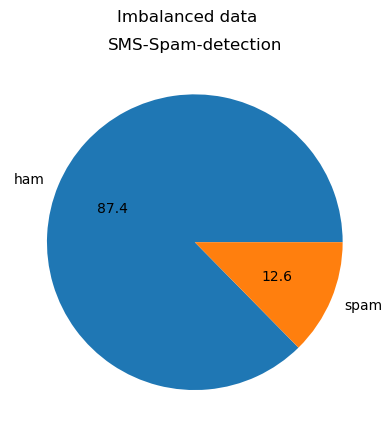

In [18]:
plt.title("SMS-Spam-detection")
plt.pie( data['target'].value_counts(), labels= ['ham', 'spam'], autopct='%0.1f')
plt.suptitle('Imbalanced data')
plt.show()

finding No. of character in Text column
--

In [19]:
data['No_Char'] = data['text'].apply(len)

In [20]:
data.head(3)

,target,text,No_Char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


finding No. of words in Text column
--

In [21]:
import nltk

In [22]:
data['No_words'] = data['text'].apply( lambda x: len(nltk.word_tokenize(x)))

In [23]:
data.head(3)

,target,text,No_Char,No_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


finding No. of sentences in Text column
--

In [24]:
data['No_sentence'] = data['text'].apply( lambda x: len(nltk.sent_tokenize(x)))

In [25]:
data.head(3)

,target,text,No_Char,No_words,No_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [26]:
data[[ 'No_Char', 'No_words', 'No_sentence']].describe()

,No_Char,No_words,No_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# ham messages: with respect to describe functions:
#-----------------------------------------------------
data[data['target']==0][[ 'No_Char', 'No_words', 'No_sentence']].describe()

,No_Char,No_words,No_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Spam messages:with respect to describe functions:
#-----------------------------------------------------
data[data['target']==1][[ 'No_Char', 'No_words', 'No_sentence']].describe()

,No_Char,No_words,No_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


------------

* here, we understanding -            

    * the number of characters, words, sentences are more in 'SPAM' msg's as compare to 'HAM' msg's

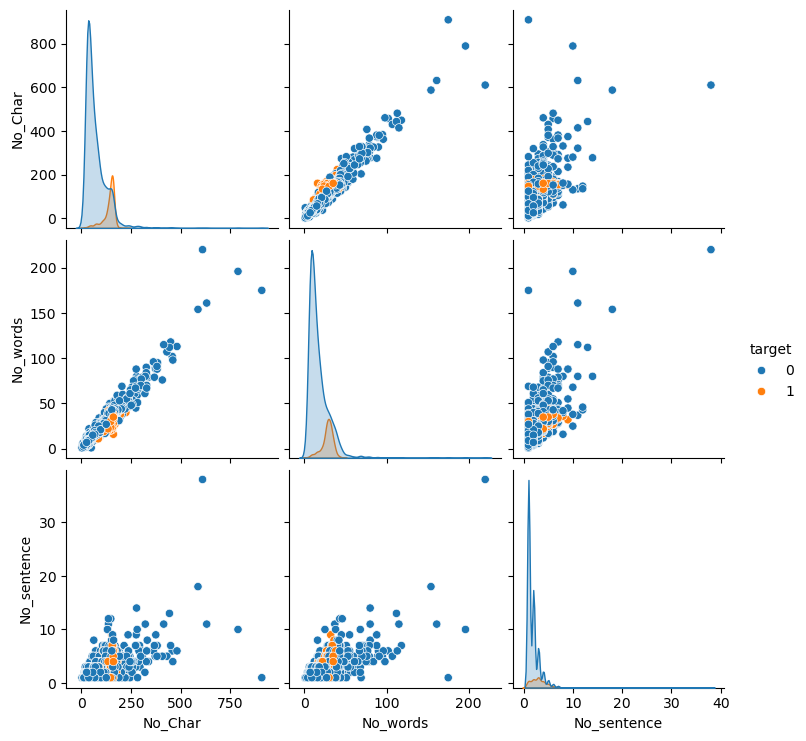

In [29]:
sns.pairplot(data, hue= 'target')
plt.show()

------------
Test Preprocessing :
-

* Lower case
* Tokenization
* Removing Special Character
* Removing stop words & punctuation
* Steamming
------------

In [31]:
from nltk.corpus import stopwords   # stopwords in english
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
import string                         # punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('gamming')

'gam'

In [34]:
def transform_text(text):
    
    text = text.lower()    # lower case convert

    text = nltk.word_tokenize(text)   # convert text (sentence) into list of words

    y = []
    for i in text:          
        if i.isalnum():        # Removing Special Characters
            y.append(i)  

    text = y[:]       # list copying
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:          # removing Stopwords & Punctuation
            y.append(i)
            
    text = y[:]       # list copying
    y.clear()

    for i in text:
        y.append(ps.stem(i))   # Steamming 
    
        
    
    return " ".join(y)   # Returning data as string

-----
Applying Transform function on our text data

In [35]:
data['transform_test'] = data['text'].apply(transform_text)

In [36]:
data.head(3)

,target,text,No_Char,No_words,No_sentence,transform_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


# Word cloud:

In [37]:

from wordcloud import WordCloud
wc = WordCloud(width= 500, height=500, min_font_size=10, background_color= 'white')

In [38]:
ham_wordcloud = wc.generate(data[ data['target']== 0]['transform_test'].str.cat(sep= " "))

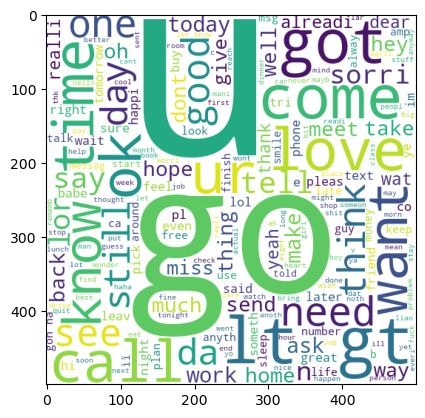

In [39]:
plt.imshow(ham_wordcloud)

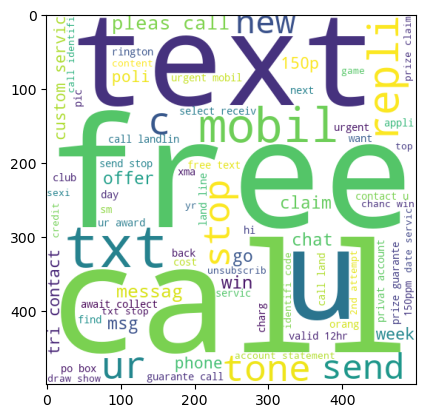

In [40]:
spam_wordcloud = wc.generate(data[ data['target']== 1]['transform_test'].str.cat(sep= " "))
plt.imshow(spam_wordcloud)

----------
Extracting top 30 common words in spam msg:
--

In [41]:
spam_corpus = []
for msg in data[ data['target'] ==1]['transform_test'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

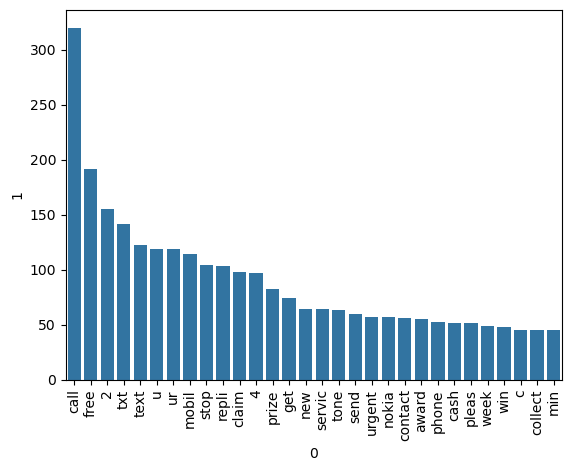

In [43]:
from collections import Counter

sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical')
plt.show()

here,             

we seeing no. of msg with thier occurence in spam msg's

---------

In [44]:
ham_corpus = []
for msg in data[ data['target'] ==0]['transform_test'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

35404

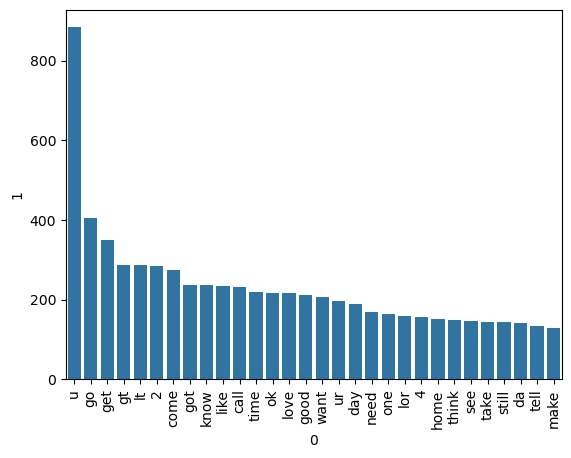

In [46]:
from collections import Counter

sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical')
plt.show()

## 4. Model Building

* Data Vectorization by using bagofwords

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features= 3000)

In [48]:
x = cv.fit_transform( data['transform_test'] ).toarray()         # text converting into number by using vectorizer

In [49]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

# data splitting into train, test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

# naive Bayes mode:

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print( accuracy_score(y_test, y_pred1)*100 )
print( confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1)*100 )

86.94390715667312
[[788 108]
 [ 27 111]]
50.68493150684932


After Tfidfvectorization with navie bayes theorem (MultinomialNB) :
--       

* best giving precision score so we are useing this for further 

In [56]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print( accuracy_score(y_test, y_pred2)*100 )
print( confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2)*100 )

97.09864603481626
[[896   0]
 [ 30 108]]
100.0


In [57]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print( accuracy_score(y_test, y_pred3)*100 )
print( confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3)*100 )

98.35589941972921
[[895   1]
 [ 16 122]]
99.1869918699187


# website:

In [58]:
import pickle

In [59]:
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [62]:
with open('transform_text.pkl', 'wb') as file:
    pickle.dump(transform_text, file)

In [61]:
bnb.score(x_train, y_train)*100, bnb.score(x_test, y_test)*100

(98.57315598548972, 98.35589941972921)